In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Load the dataset
data = pd.read_csv('results.csv', delimiter='|')

In [4]:
#print the first 5 rows
data.head()

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


In [5]:
#  Data Preprocessing
# Check for missing values
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 image_name         0
 comment_number    0
 comment           1
dtype: int64


In [6]:
# Handle missing values (e.g., filling with mode or removing rows)
data.fillna(data.mode().iloc[0], inplace=True)

In [7]:
# Remove duplicate rows
data = data.drop_duplicates()

In [8]:
# Check basic stats
print("\nDataset statistics:\n", data.describe())


Dataset statistics:
             image_name  comment_number                          comment
count           158915          158915                           158915
unique           31783               6                           158438
top     1000092795.jpg               0   Two dogs playing in the snow .
freq                 5           31783                                8


C:\Users\harik\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\harik\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Figure size 400x400 with 0 Axes>

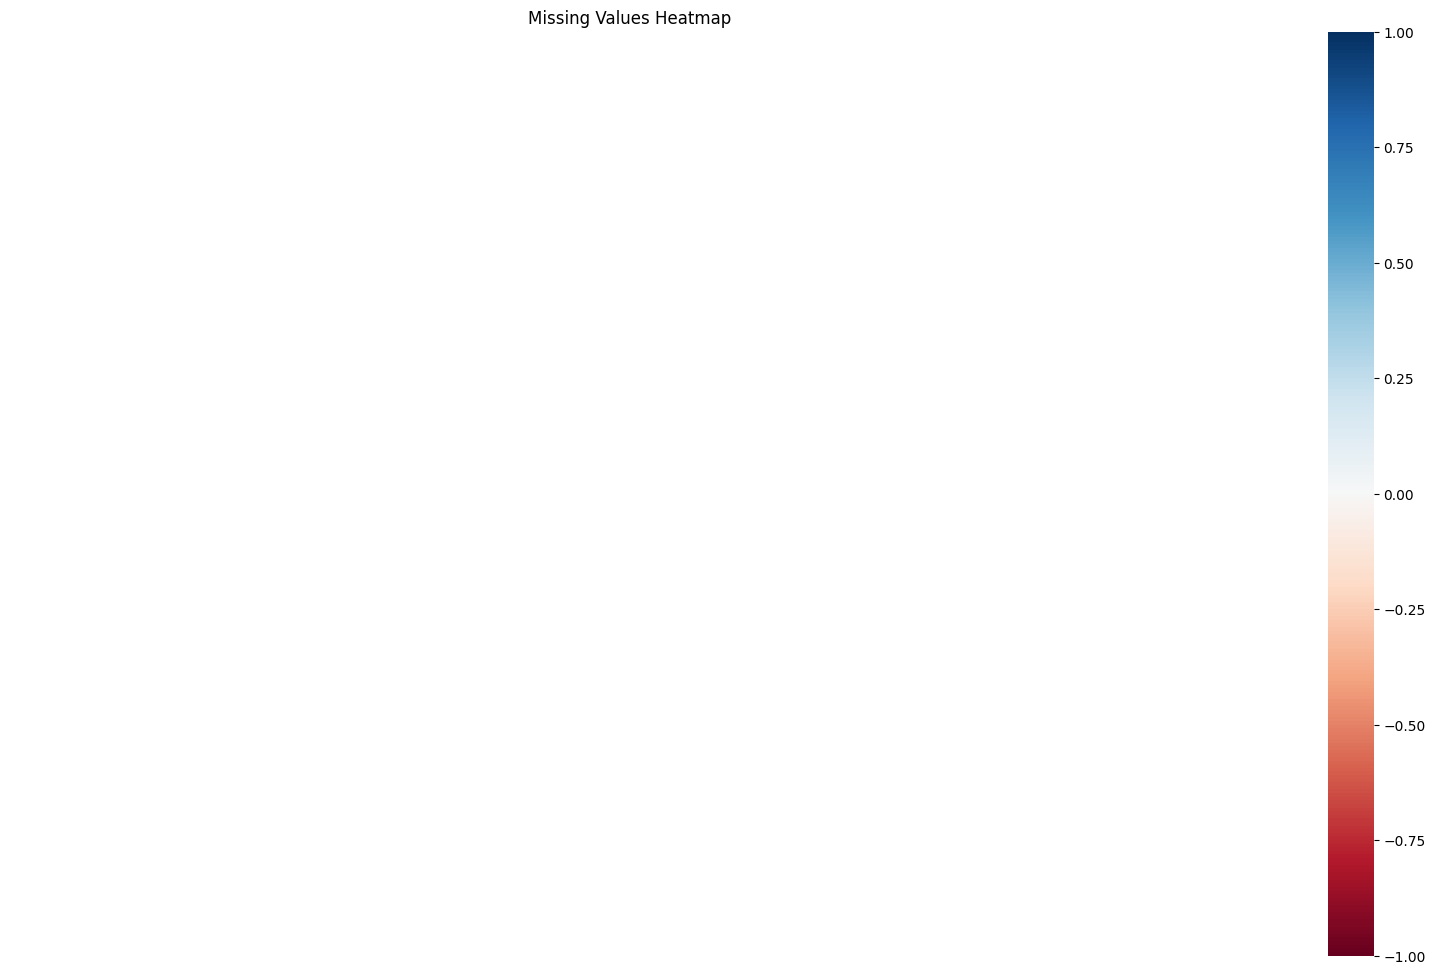

In [15]:
import missingno as msno
# Visualizing missing values using a heatmap
plt.figure(figsize=(4, 4))  # Adjusting to a smaller size
msno.heatmap(data)
plt.title('Missing Values Heatmap')
plt.show()

In [18]:
print(data.columns)

Index(['image_name', ' comment_number', ' comment'], dtype='object')


In [19]:
data.columns = data.columns.str.strip()  # Removes any leading/trailing spaces

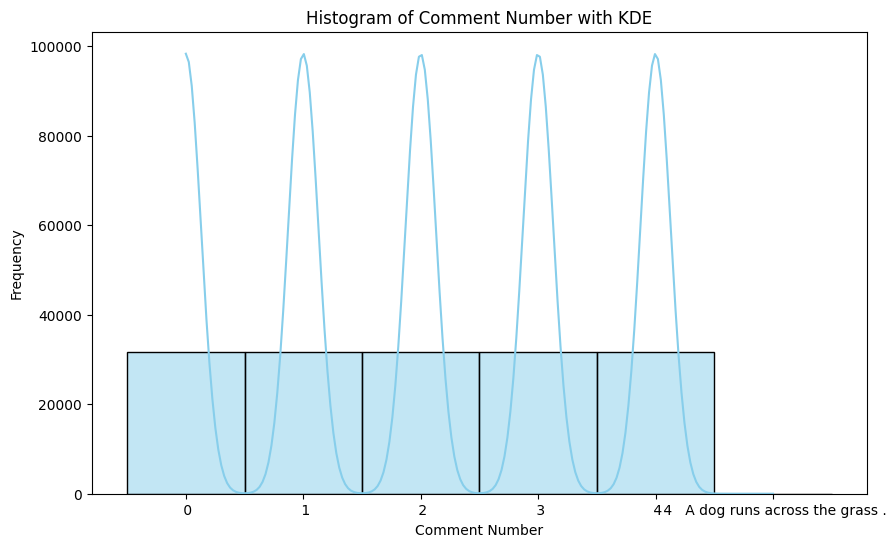

In [20]:
# Histogram of 'comment_number' with KDE (Density Estimation)
plt.figure(figsize=(10, 6))
sns.histplot(data['comment_number'], kde=True, color='skyblue', bins=5)
plt.title('Histogram of Comment Number with KDE')
plt.xlabel('Comment Number')
plt.ylabel('Frequency')
plt.show()


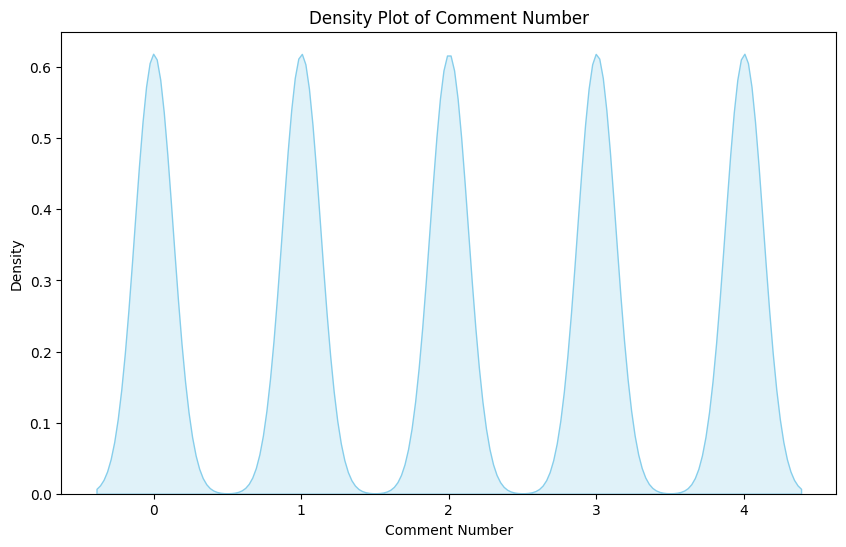

In [24]:
# Ensure 'comment_number' is numeric
data['comment_number'] = pd.to_numeric(data['comment_number'], errors='coerce')

# Example: Plotting the density (KDE) of the 'comment_number' feature
plt.figure(figsize=(10, 6))
sns.kdeplot(data['comment_number'], color='skyblue', fill=True)  # Use fill instead of shade
plt.title('Density Plot of Comment Number')
plt.xlabel('Comment Number')
plt.ylabel('Density')
plt.show()

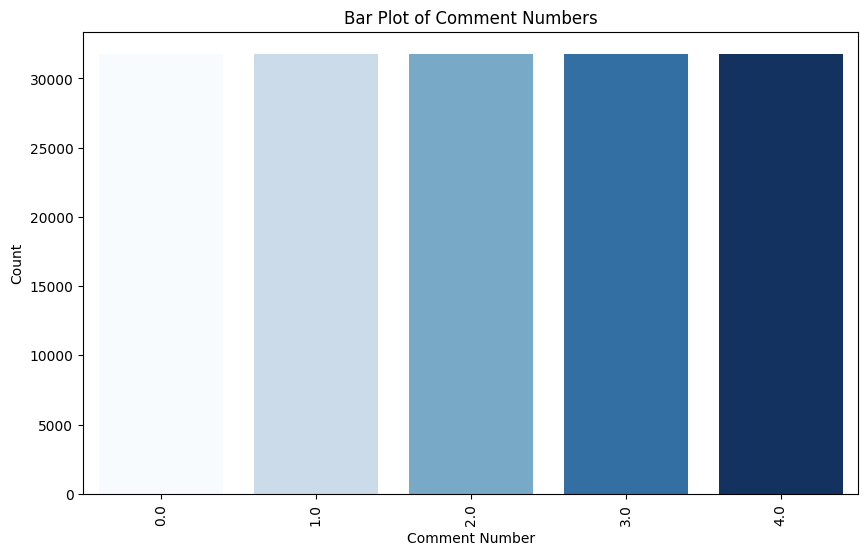

In [26]:
# Example: Bar plot for 'comment_number'
plt.figure(figsize=(10, 6))
sns.countplot(x='comment_number', data=data, hue='comment_number', palette='Blues', legend=False)
plt.title('Bar Plot of Comment Numbers')
plt.xlabel('Comment Number')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate the x-axis labels if needed
plt.show()

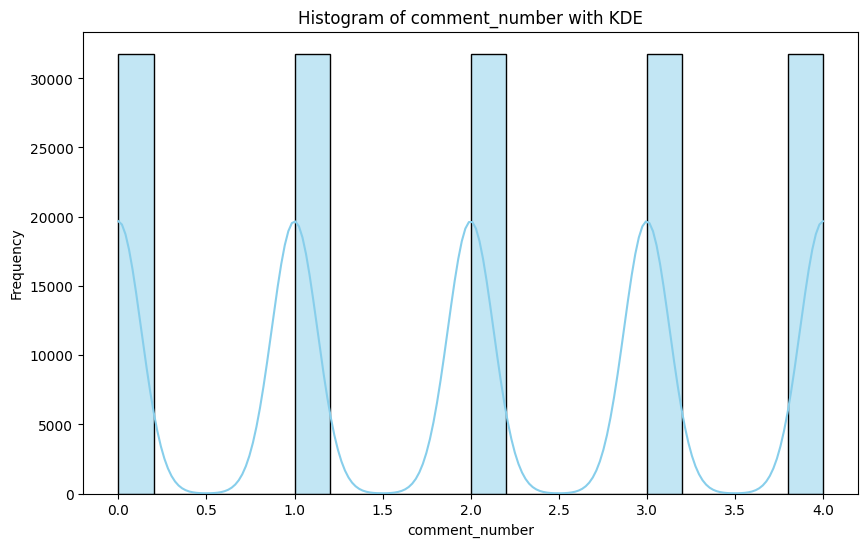

C:\Users\harik\AppData\Local\Temp\ipykernel_20636\3522001972.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Blues')


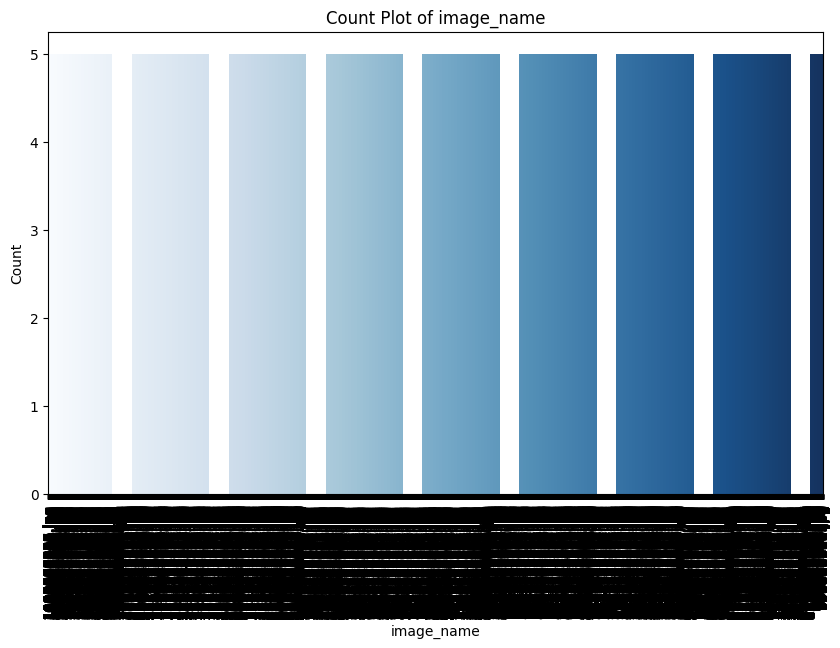

C:\Users\harik\AppData\Local\Temp\ipykernel_20636\3522001972.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Blues')

KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x0000022FF84194E0> (for post_execute):



KeyboardInterrupt



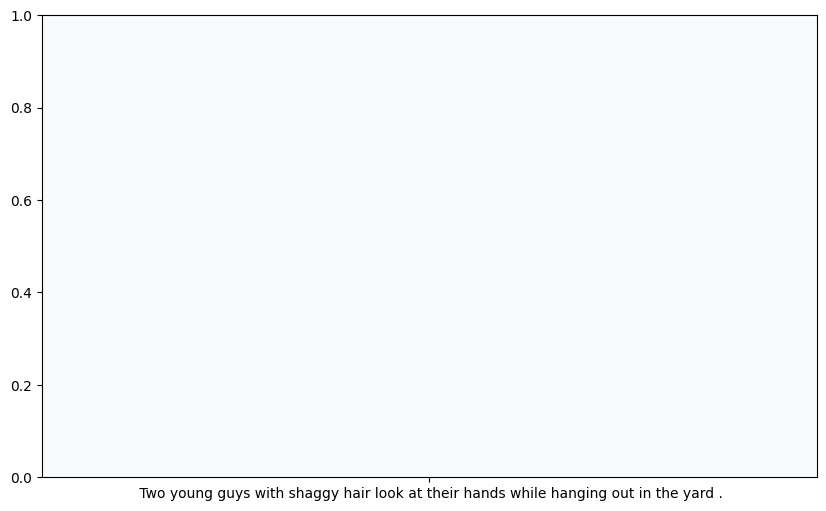

In [27]:
# Plotting histograms for numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, color='skyblue', bins=20)
    plt.title(f'Histogram of {col} with KDE')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Plotting bar plots for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data, palette='Blues')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate the x-axis labels if needed
    plt.show()

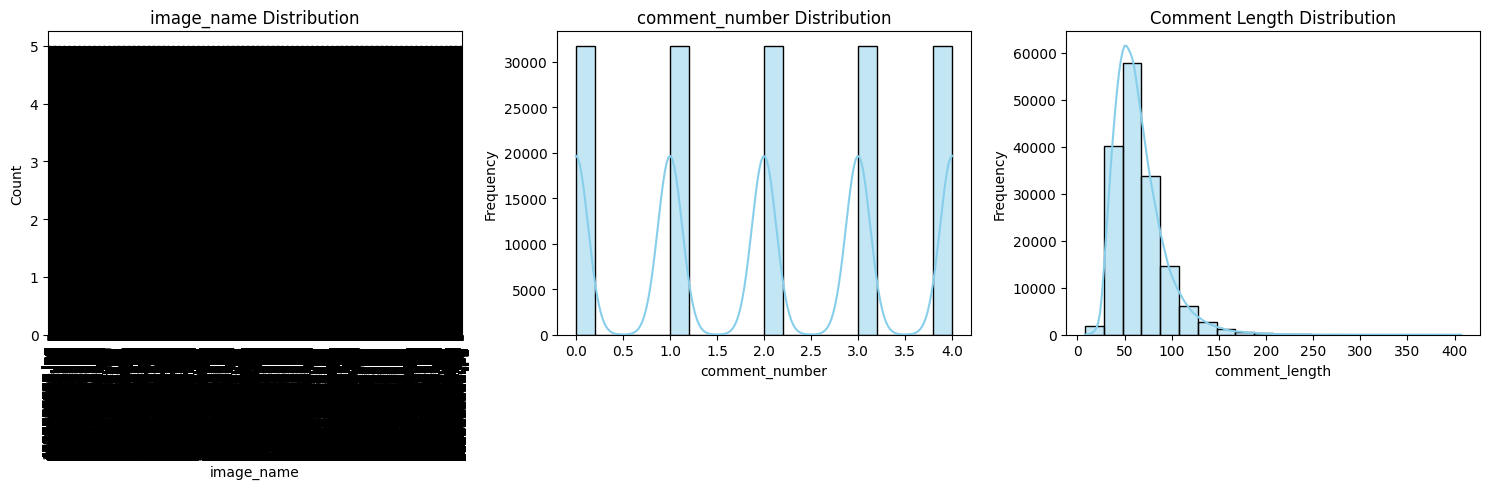

In [28]:
import math

# Define the columns to plot
columns = ['image_name', 'comment_number', 'comment']

# Calculate grid size based on the number of columns
num_cols = len(columns)
rows = math.ceil(num_cols / 3)  # 3 plots per row

plt.figure(figsize=(15, rows * 5))

# Loop through each column and create an appropriate plot
for i, col in enumerate(columns, 1):
    plt.subplot(rows, 3, i)
    
    if data[col].dtype == 'object':  # If column is categorical (e.g., image_name, comment)
        if col == 'image_name':  # Count the occurrences of image names
            data[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
            plt.ylabel('Count')
            plt.title(f'{col} Distribution')
        elif col == 'comment':  # Count the number of comments (or their lengths)
            data['comment_length'] = data['comment'].apply(len)  # Create a new column for comment length
            sns.histplot(data['comment_length'], kde=True, color='skyblue', bins=20)
            plt.ylabel('Frequency')
            plt.title(f'Comment Length Distribution')

    else:  # If column is numeric (e.g., comment_number)
        sns.histplot(data[col], kde=True, color='skyblue', bins=20)
        plt.ylabel('Frequency')
        plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()